In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..'); sys.path.append('../gp/')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [126]:
input_image = []
input_prob = []
input_gold = []
input_rhoana = []

# for z in range(0,50):
test_slices = range(15,25) + range(40,50) + range(65,75)
for z in test_slices:
    image, prob, gold, rhoana = gp.Util.read_cremi_section(os.path.expanduser('/home/d/data/CREMIGP/TEST/'), z)
    input_image.append(image[0:500,0:500])
    input_prob.append(255.-prob[0:500,0:500])
    input_gold.append(gold[0:500,0:500])
    input_rhoana.append(rhoana[0:500,0:500])    

In [127]:
import time
t0 = time.time()
merge_errors = gp.Legacy.get_top5_merge_errors(net, input_image, input_prob, input_rhoana, verbose=True)
print time.time()-t0

working on slice 0
working on slice 1
working on slice 2
working on slice 3
working on slice 4
working on slice 5
working on slice 6
working on slice 7
working on slice 8
working on slice 9
working on slice 10
working on slice 11
working on slice 12
working on slice 13
working on slice 14
working on slice 15
working on slice 16
working on slice 17
working on slice 18
working on slice 19
working on slice 20
working on slice 21
working on slice 22
working on slice 23
working on slice 24
working on slice 25
working on slice 26
working on slice 27
working on slice 28
working on slice 29
merge error correction done after 1106.43245101 seconds
1106.43267703


In [130]:
len(merge_errors)

282

In [198]:
len(input_gold)

30

In [84]:
NETS = []
NETS.append('../nets/IPMLB_FULL_CREMILARGE.p') # image + prob + binary + large border

network_path = NETS[-1]

with open(network_path, 'rb') as f:
    net = pickle.load(f)

In [112]:
net.uuid

'IPMLB'

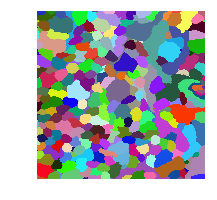

In [3]:
gp.Util.view(gold)

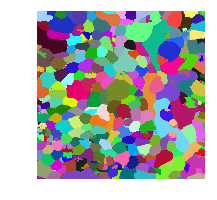

In [8]:
gp.Util.view(rhoana)

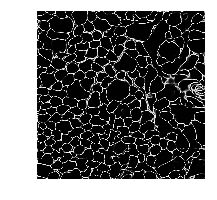

In [16]:
gp.Util.view(255.-prob, color=False)

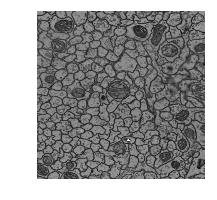

In [10]:
gp.Util.view(image, color=False)

In [137]:
original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_rhoana, input_gold)

In [12]:
gp.metrics.adapted_rand(rhoana, gold)

0.25980237467181599

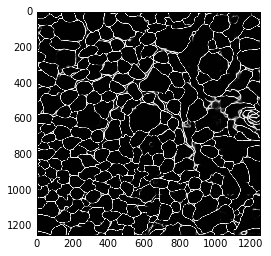

In [105]:
imshow(input_prob[0], cmap='gray')

In [129]:
net.uuid = 'IPMLB'
bigM_cremiA = gp.Legacy.create_bigM_without_mask(net, input_image, input_prob, input_rhoana, verbose=True)

432 generated in 2.34614109993 seconds.
Grouped into 107 patches in 0.00199794769287 seconds.
448 generated in 3.35771393776 seconds.
Grouped into 111 patches in 0.0021231174469 seconds.
716 generated in 4.43210101128 seconds.
Grouped into 177 patches in 0.00339102745056 seconds.
748 generated in 5.18829798698 seconds.
Grouped into 187 patches in 0.00322103500366 seconds.
692 generated in 5.04825901985 seconds.
Grouped into 171 patches in 0.00323390960693 seconds.
544 generated in 4.12669491768 seconds.
Grouped into 133 patches in 0.0024778842926 seconds.
556 generated in 4.07311797142 seconds.
Grouped into 137 patches in 0.00258779525757 seconds.
660 generated in 4.64634394646 seconds.
Grouped into 165 patches in 0.00292491912842 seconds.
624 generated in 4.81118893623 seconds.
Grouped into 154 patches in 0.00306701660156 seconds.
488 generated in 4.15620493889 seconds.
Grouped into 122 patches in 0.00230979919434 seconds.
340 generated in 2.67669081688 seconds.
Grouped into 67 patche

In [132]:
for z in range(len(bigM_cremiA)):
    
    print bigM_cremiA[z].max()

0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.855901658535
0.856931686401
0.856931686401
0.856931686401
0.856932997704
0.85269767046
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856931686401
0.856249272823
0.856931686401


In [136]:
len(input_gold)

30

In [151]:
output_folder = '/home/d/GPCREMI/'
dojo_vi_95_file = output_folder + '/cremi_vi_95_t61.p'

dojo_merge_vis = output_folder + '/cremi_merge_auto95_vis.p'
dojo_split_vis = output_folder + '/cremi_split_auto95_vis.p'

dojo_merge_fixes = output_folder + '/cremi_merge_auto95_fixes.p'
dojo_split_fixes = output_folder + '/cremi_split_auto95_fixes.p'

dojo_output_95 = output_folder + '/cremi_auto95_output.p'

if os.path.exists(dojo_vi_95_file):
  print 'Loading merge errors p < .05 and split errors p > .95 from file..'
  with open(dojo_vi_95_file, 'rb') as f:
    dojo_vi_95 = pickle.load(f)
else:      
  #
  # perform merge correction with p < .05
  #
  print 'Correcting merge errors with p < .05'
  bigM_dojo_05, corrected_rhoana_05, dojo_auto_merge_fixes, vi_s_per_step = gp.Legacy.perform_auto_merge_correction(net, bigM_cremiA, 
                                                                                                                    input_image, input_prob, input_rhoana, 
                                                                                                                    merge_errors, .05, input_gold=input_gold)

  print '   Mean VI improvement', original_mean_VI-gp.Legacy.VI(input_gold, corrected_rhoana_05)[0]
  print '   Median VI improvement', original_median_VI-gp.Legacy.VI(input_gold, corrected_rhoana_05)[1]

  with open(dojo_merge_vis, 'wb') as f:
    pickle.dump(vi_s_per_step, f)


  with open(dojo_merge_fixes, 'wb') as f:
    pickle.dump(dojo_auto_merge_fixes, f) 

Correcting merge errors with p < .05
fixing 0.00652392674237
fixing 0.0148607259616
fixing 0.0185579415411
fixing 0.0209641493857
fixing 0.0322633720934
fixing 0.011766104959
fixing 0.0254631321877
fixing 0.0316482260823
fixing 0.00714402925223
fixing 0.049994841218
   Mean VI improvement 0.0024243079079
   Median VI improvement 0.0


In [153]:
bigM_cA_after_95, out_cA_volume_after_auto_95, cA_auto_fixes_95, cA_auto_vi_s_95, visperstep = gp.Legacy.splits_global_from_M_automatic(net, 
                                                                                                                            #bigM_cremiA, 
                                                                                                                                        bigM_dojo_05,
                                                                                                                                        
                                                                                                                            input_image, 
                                                                                                                            input_prob, 
                                                                                                                            corrected_rhoana_05,
                                                                                                                            input_gold, 
                                                                                                                            sureness_threshold=.75)


0.746747910976


In [199]:
original_VI_s

[1.0549800794594688,
 1.0787705373852496,
 1.0861358078168148,
 0.9675713369670014,
 0.9997668056591769,
 0.9459034373828512,
 0.9877676442733927,
 0.9141360710451147,
 1.031830053143838,
 0.8788253949176683,
 1.6836230208130387,
 1.5795090743954079,
 1.525698278449243,
 1.5294184161061146,
 1.5089478700765797,
 1.5729122516497531,
 1.497966590050276,
 1.509997243873567,
 1.4813236033061328,
 1.5360103698782628,
 1.549647392613978,
 1.5256067574557957,
 1.6481299808338532,
 1.6513143780877426,
 1.4779760288996808,
 1.4864270335469092,
 1.4094745372930033,
 1.3310744400437553,
 1.3739251218870159,
 1.5206372358397617]

In [169]:
original_mean_VI

1.3448435597716817

In [159]:
OUTDIR = '/home/d/GPCREMI/'
merge_vis = OUTDIR + '/cremi_merge_auto95_vis.p'
split_vis = OUTDIR + '/cremi_split_auto95_vis.p'

merge_fixes = OUTDIR + '/cremi_merge_auto95_fixes.p'
split_fixes = OUTDIR + '/cremi_split_auto95_fixes.p'

output_95 = OUTDIR + '/cremi_auto95_output.p'

In [158]:

with open(merge_vis, 'wb') as f:
    pickle.dump(vi_s_per_step, f)


with open(merge_fixes, 'wb') as f:
    pickle.dump(dojo_auto_merge_fixes, f) 

In [162]:

with open(split_vis, 'wb') as f:
    pickle.dump(visperstep, f)

with open(split_fixes, 'wb') as f:
    pickle.dump(cA_auto_fixes_95, f)       

with open(output_95, 'wb') as f:
    pickle.dump(out_cA_volume_after_auto_95, f) 


In [187]:
len(bigM_cremiA)

30

In [163]:

merge_vis = OUTDIR + '/cremi_merge_simuser_vis.p'
split_vis = OUTDIR + '/cremi_split_simuser_vis.p'

merge_fixes = OUTDIR + '/cremi_merge_simuser_fixes.p'
split_fixes = OUTDIR + '/cremi_split_simuser_fixes.p'

output_95 = OUTDIR + '/cremi_simuser_output.p'

In [190]:
bigM_05, corrected_rhoana_05, cylinder_auto_merge_fixes, vi_s_per_step = gp.Legacy.perform_sim_user_merge_correction(net, bigM_cremiA, input_image, input_prob, input_rhoana, input_gold, merge_errors)

adding 152 to 0 (500, 500) 152 30
adding 154 to 0 (500, 500) 154 30
adding 156 to 0 (500, 500) 156 30
adding 157 to 0 (500, 500) 157 30
adding 159 to 0 (500, 500) 159 30
adding 161 to 0 (500, 500) 161 30
adding 162 to 0 (500, 500) 162 30
adding 164 to 0 (500, 500) 164 30
adding 137 to 1 (500, 500) 137 30
adding 138 to 1 (500, 500) 138 30
adding 140 to 1 (500, 500) 140 30
adding 142 to 1 (500, 500) 142 30
adding 144 to 1 (500, 500) 144 30
adding 146 to 1 (500, 500) 146 30
adding 148 to 1 (500, 500) 148 30
adding 150 to 1 (500, 500) 150 30
adding 152 to 1 (500, 500) 152 30
adding 154 to 1 (500, 500) 154 30
adding 177 to 2 (500, 500) 177 30
adding 178 to 2 (500, 500) 178 30
adding 180 to 2 (500, 500) 180 30
adding 182 to 2 (500, 500) 182 30
adding 184 to 2 (500, 500) 184 30
adding 186 to 2 (500, 500) 186 30
adding 187 to 2 (500, 500) 187 30
adding 179 to 3 (500, 500) 179 30
adding 181 to 3 (500, 500) 181 30
adding 183 to 3 (500, 500) 183 30
adding 185 to 3 (500, 500) 185 30
adding 187 to 

In [182]:
bigM_cremiA[13].shape

(118, 118)

In [172]:
cylinder_auto_merge_fixes

NameError: name 'cylinder_auto_merge_fixes' is not defined

In [191]:

with open(merge_vis, 'wb') as f:
    pickle.dump(vi_s_per_step, f)


with open(merge_fixes, 'wb') as f:
    pickle.dump(cylinder_auto_merge_fixes, f) 

In [192]:
bigM_cylinder_after_95, out_cylinder_volume_after_auto_95, cylinder_auto_fixes_95, cylinder_auto_vi_s_95, vi_s_per_step2 = gp.Legacy.splits_global_from_M(net, bigM_05,
input_image, input_prob, corrected_rhoana_05, input_gold, hours=-1)

done


In [193]:
split_fixes = OUTDIR + '/cylinder_split_simuser_fixes.p'

In [194]:
split_vis = OUTDIR + '/cylinder_split_simuser_vis.p'

In [195]:
output_95 = OUTDIR + '/cylinder_simuser_output.p'

In [196]:
with open(split_vis, 'wb') as f:
    pickle.dump(vi_s_per_step2, f)

with open(split_fixes, 'wb') as f:
    pickle.dump(cylinder_auto_fixes_95, f)       

with open(output_95, 'wb') as f:
    pickle.dump(out_cylinder_volume_after_auto_95, f) 

In [38]:
bigM_cA_after_95, out_cA_volume_after_auto_95, cA_auto_fixes_95, cA_auto_vi_s_95, visperstep = gp.Legacy.splits_global_from_M_automatic(net, 
                                                                                                                            bigM_cremiA, 
                                                                                                                            input_image, 
                                                                                                                            input_prob, 
                                                                                                                            input_rhoana,
                                                                                                                            input_gold, 
                                                                                                                            sureness_threshold=.95)


here


In [135]:
gp.Legacy.VI(out_cA_volume_after_auto_95, input_gold)

(1.2772683303625527,
 1.4227682148970084,
 [0.9914972295290623,
  1.0065468511430007,
  0.9386433274922785,
  0.8513864951451726,
  0.9020146231854129,
  0.9028561846963399,
  0.9029402917052867,
  0.8343376887584597,
  0.8900334300076347,
  0.7640631368301207,
  1.5897406283580051,
  1.4259567455799158,
  1.4067934875872496,
  1.50799981769243,
  1.4216826061807275,
  1.5739188222653064,
  1.49120944768171,
  1.524625720524651,
  1.4673106923648627,
  1.4389061338649043,
  1.4238538236132894,
  1.2980002460822213,
  1.5434885895724069,
  1.5995917290199704,
  1.477708348120366,
  1.4370088289571,
  1.3529149509418676,
  1.3095287650616445,
  1.5158051045850938,
  1.527686164330098])

In [27]:
visperstep

[(1.1205187243522197,
  1.1205187243522197,
  [1.0903680301647931, 1.1506694185396462]),
 (1.1205750199211311,
  1.1205750199211311,
  [1.090480621302616, 1.1506694185396462]),
 (1.1205373537420451,
  1.1205373537420451,
  [1.090405288944444, 1.1506694185396462]),
 (1.1204855308356558,
  1.1204855308356558,
  [1.090405288944444, 1.1505657727268677]),
 (1.1204578291693812,
  1.1204578291693812,
  [1.090405288944444, 1.1505103693943184]),
 (1.1204093220969673,
  1.1204093220969673,
  [1.0903082747996162, 1.1505103693943184]),
 (1.1204352670924926,
  1.1204352670924926,
  [1.0903601647906669, 1.1505103693943184]),
 (1.120432408075092,
  1.120432408075092,
  [1.0903601647906669, 1.1505046513595172]),
 (1.1204205447144391,
  1.1204205447144391,
  [1.090336438069361, 1.1505046513595172]),
 (1.1203517795432445,
  1.1203517795432445,
  [1.0901989077269718, 1.1505046513595172]),
 (1.1203197728565311,
  1.1203197728565311,
  [1.090134894353545, 1.1505046513595172]),
 (1.1202874124069959,
  1.120

In [56]:
gp.metrics.adapted_rand(out_cA_volume_after_auto_95, input_gold)

0.51512425659267813

In [57]:
cA_auto_fixes_95

[(0, 0.99999964237213135),
 (1, 0.99993455410003662),
 (0, 0.99991738796234131),
 (0, 0.99988996982574463),
 (0, 0.99985110759735107),
 (0, 0.99977564811706543),
 (0, 0.9997628927230835),
 (1, 0.99975866079330444),
 (0, 0.99974793195724487),
 (0, 0.99972277879714966),
 (0, 0.99971282482147217),
 (0, 0.99967020750045776),
 (1, 0.99959456920623779),
 (1, 0.999583899974823),
 (0, 0.99957650899887085),
 (1, 0.99951696395874023),
 (1, 0.99937832355499268),
 (0, 0.99928903579711914),
 (1, 0.99907684326171875),
 (0, 0.99902892112731934),
 (0, 0.99892705678939819),
 (0, 0.99888914823532104),
 (1, 0.9998706579208374),
 (1, 0.99888545274734497),
 (1, 0.99886083602905273),
 (0, 0.99883228540420532),
 (0, 0.99930858612060547),
 (0, 0.99880576133728027),
 (0, 0.99867504835128784),
 (1, 0.99838781356811523),
 (0, 0.99836021661758423),
 (1, 0.998313307762146),
 (0, 0.99977326393127441),
 (1, 0.99948069096907322),
 (0, 0.99829679727554321),
 (0, 0.99823164939880371),
 (0, 0.99810117483139038),
 (0, 0.

In [64]:
import numpy as np

In [70]:
p = np.load('/tmp/trainB.npz.npy', mmap_mode='r')
t = np.load('/tmp/trainB_targets.npz.npy', mmap_mode='r')

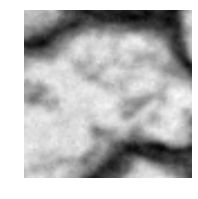

In [80]:
gp.Util.view(p[2][0], color=False)

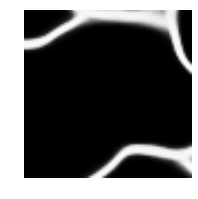

In [81]:
gp.Util.view(p[2][1], color=False)

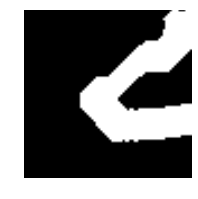

In [83]:
gp.Util.view(p[2][3], color=False)

In [79]:
t[2]

1.0